# Deep Learning Image Classification
This notebook demonstrates a CNN model for image classification on CIFAR-10.

# Image Classification with CNN on CIFAR-10


In [1]:
# Install tensorflow if not already installed

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Set random seed for reproducibility
np.random.seed(42)

## Data Loading and Preprocessing
load and preprocess the CIFAR-10 dataset.

In [2]:
def load_and_preprocess_data():
    """
    Load CIFAR-10 dataset and preprocess it by:
    1. Normalizing pixel values to [0, 1]
    2. One-hot encoding the labels
    3. Splitting into train and test sets
    
    Returns:
        (x_train, y_train), (x_test, y_test): Preprocessed training and testing data
    """
    # Load CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    
    # Normalize pixel values to be between 0 and 1
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    
    # One-hot encode the labels
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()

# Print dataset shape
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


## Baseline Model

In [3]:
def create_baseline_model():
    """
    Creates a simple baseline model (not CNN) for comparison.
    This is a simple fully connected neural network.
    
    Returns:
        model: Compiled baseline model
    """
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create and train baseline model
baseline_model = create_baseline_model()
baseline_history = baseline_model.fit(x_train, y_train, 
                                     epochs=20, 
                                     batch_size=64, 
                                     validation_data=(x_test, y_test),
                                     verbose=1)

# Evaluate baseline model
baseline_loss, baseline_acc = baseline_model.evaluate(x_test, y_test, verbose=0)
print(f"Baseline Model - Test Accuracy: {baseline_acc:.4f}")

c:\Python39\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2704 - loss: 2.0112 - val_accuracy: 0.3752 - val_loss: 1.7576
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2704 - loss: 2.0112 - val_accuracy: 0.3752 - val_loss: 1.7576
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3778 - loss: 1.7377 - val_accuracy: 0.4043 - val_loss: 1.6726
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3778 - loss: 1.7377 - val_accuracy: 0.4043 - val_loss: 1.6726
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4042 - loss: 1.6696 - val_accuracy: 0.4220 - val_loss: 1.6264
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4042 - loss: 1.6696 - val_accuracy: 0.4220 - val_loss: 1.6264
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4256 - loss: 1.6122 - val_accuracy: 0.4199 - val_loss: 1.6263
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4256 - loss: 1.6122 - val_accuracy: 0.

## CNN Model Architecture 

In [4]:
def create_cnn_model():
    """
    Creates a custom CNN model with:
    - Convolutional layers with ReLU activation
    - Max pooling layers
    - Batch normalization
    - Dropout for regularization
    - Fully connected layers at the end
    
    Returns:
        model: Compiled CNN model
    """
    model = models.Sequential()
    
    # First Conv Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    
    # Second Conv Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    
    # Third Conv Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))
    
    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create CNN model
cnn_model = create_cnn_model()
cnn_model.summary()

c:\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

## Training the CNN Model

In [5]:
# Train the CNN model
history = cnn_model.fit(x_train, y_train,
                        epochs=50,
                        batch_size=64,
                        validation_data=(x_test, y_test),
                        verbose=1)

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=0)
print(f"CNN Model - Test Accuracy: {test_acc:.4f}")

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.3696 - loss: 1.9606 - val_accuracy: 0.5672 - val_loss: 1.1978
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 55ms/step - accuracy: 0.3696 - loss: 1.9606 - val_accuracy: 0.5672 - val_loss: 1.1978
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6093 - loss: 1.1056 - val_accuracy: 0.6775 - val_loss: 0.9337
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.6093 - loss: 1.1056 - val_accuracy: 0.6775 - val_loss: 0.9337
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.6881 - loss: 0.9013 - val_accuracy: 0.7184 - val_loss: 0.8010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.6881 - loss: 0.9013 - val_accuracy: 0.7184 - val_loss: 0.8010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7179 - loss: 0.8055 - val_accuracy: 0.7100 - val_loss: 0.8283
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.7179 - loss: 0.8055 - 

##  Model Evaluation and Visualization

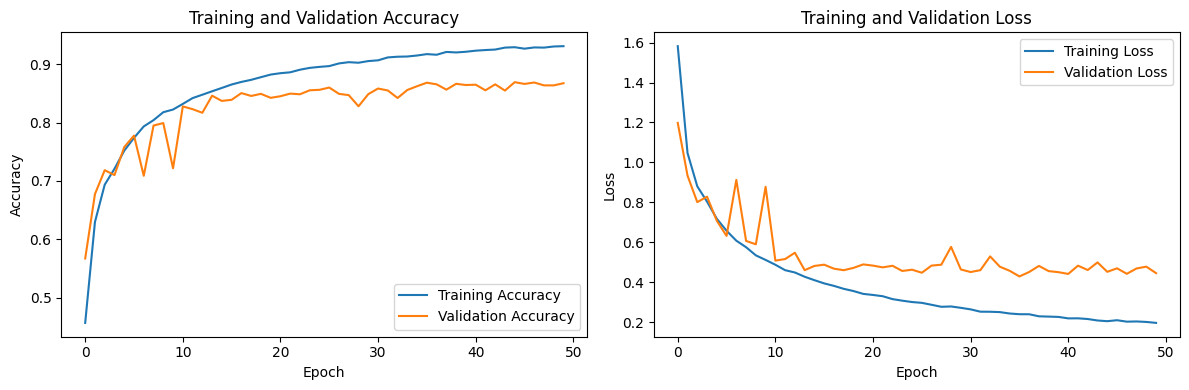

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       0.95      0.92      0.93      1000
           2       0.84      0.79      0.82      1000
           3       0.79      0.70      0.74      1000
           4       0.82      0.89      0.86      1000
           5       0.81      0.80      0.80      1000
           6       0.86      0.93      0.89      1000
           7       0.91      0.90      0.90      1000
           8       0.92      0.92      0.92      1000
           9       0.89      0.94      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
  

In [6]:
def plot_history(history):
    """
    Plot training and validation accuracy and loss over epochs.
    
    Args:
        history: Training history object returned by model.fit()
    """
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot training history
plot_history(history)

# Classification report
y_pred = cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

## Results Analysis

Baseline Model Test Accuracy: 0.4846
CNN Model Test Accuracy: 0.8673
Improvement: 38.27%


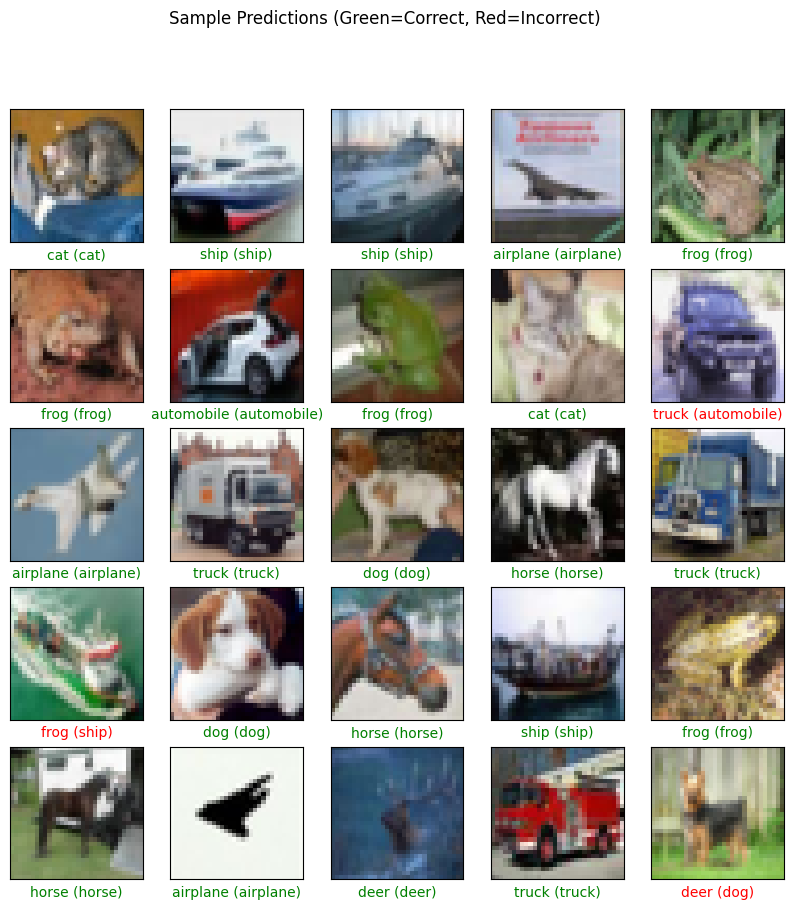

In [7]:
# Compare baseline and CNN models
print(f"Baseline Model Test Accuracy: {baseline_acc:.4f}")
print(f"CNN Model Test Accuracy: {test_acc:.4f}")
print(f"Improvement: {(test_acc - baseline_acc)*100:.2f}%")

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Sample predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    predicted_label = class_names[y_pred_classes[i]]
    true_label = class_names[y_true[i]]
    plt.xlabel(f"{predicted_label} ({true_label})", color='green' if predicted_label == true_label else 'red')
plt.suptitle("Sample Predictions (Green=Correct, Red=Incorrect)")
plt.show()